![alt text](olympics-logo.jpg "Title")

# 120 Years of Olympic Medals: An Overview of Medals (1896 – 2016)
### Beginning in 1896, the first Summer Olympic Games were held in Athens, Greece, offering 42 events with competitors from 14 nations. The success of these games later resulted in the creation of the Winter Olympic Games, first held in 1924 in Chamonix, France, offering 16 events with competitors from 16 nations.

**The following is an analysis of Olympic Data for the first 120 years**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
import matplotlib.mlab as mlab
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

%matplotlib inline

#### Import the Data and read the csv into a Pandas Dataframe

In [38]:
Athletes_Data = r'C:\Users\peter\OneDrive\Documents\SQL\Course #3 Spark\athlete_events.csv'
Country_Data = r'C:\Users\peter\OneDrive\Documents\SQL\Course #3 Spark\noc_regions.csv'

In [3]:
athletes = pd.read_csv(Athletes_Data)
countries = pd.read_csv(Country_Data)

#### Examine the athletes dataframe and check it's size

In [4]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
athletes

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


#### Examine the counties dataframe

In [6]:
countries.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


#### Examine the data in "athletes"--mainly for missing values

In [39]:
athletes.count()

ID        271116
Name      271116
Sex       271116
Age       261642
Height    210945
Weight    208241
Team      271116
NOC       271116
Games     271116
Year      271116
Season    271116
City      271116
Sport     271116
Event     271116
Medal      39783
region    270746
dtype: int64

In [8]:
print("earliest: ", athletes.Year.min())
print("latest: ", athletes.Year.max())

earliest:  1896
latest:  2016


#### *We see that our data is from 1896 to 2016*

<AxesSubplot:>

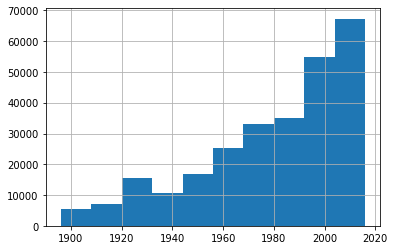

In [9]:
athletes.Year.hist()

## We want to be able to run some SQL code in Python

In [14]:
pip install -U pandasql

Requirement already up-to-date: pandasql in c:\users\peter\anaconda3_new\lib\site-packages (0.7.3)
Note: you may need to restart the kernel to use updated packages.


In [10]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

#### Next, we examine our datasets from a SQL perspective

In [11]:
pysqldf("SELECT * FROM athletes;")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None


In [17]:
pysqldf("SELECT * FROM countries;")

,NOC,region,notes
0,AFG,Afghanistan,None
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,None
3,ALG,Algeria,None
4,AND,Andorra,None
...,...,...,...
225,YEM,Yemen,None
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,None


#### Later we will compare Medals won by Men and Women. So let's just start with that.

In [18]:
pysqldf("SELECT Season, Sex, Count(*) FROM athletes Group By Season, Sex;")

,Season,Sex,Count(*)
0,Summer,F,59443
1,Summer,M,163109
2,Winter,F,15079
3,Winter,M,33485


## The following is some exploratory statistics on our datatsets. Nothing really stands out.

In [19]:
athletes.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [20]:
countries.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,WIF,Germany,Virgin Islands
freq,1,4,1


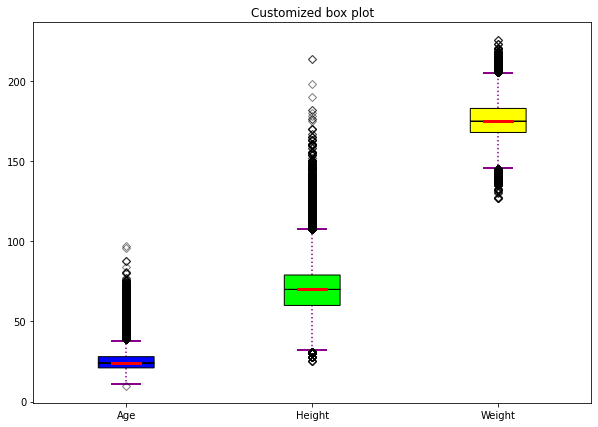

In [37]:
import matplotlib.pyplot as plt
value1 = athletes['Age'].dropna()
value2=athletes['Weight'].dropna()
value3=athletes['Height'].dropna()
data=[value1,value2,value3]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = plt.boxplot(data, patch_artist = True,
                notch =True, vert = 1)
 
colors = ['#0000FF', '#00FF00',
          '#FFFF00']
          #, '#FF00FF']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='blue',
              #color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_xticklabels(['Age', 'Height',
                    'Weight'])
 
# Adding title
plt.title("Customized box plot")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show(bp)

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>],
       [<AxesSubplot:title={'center':'Year'}>, <AxesSubplot:>]],
      dtype=object)

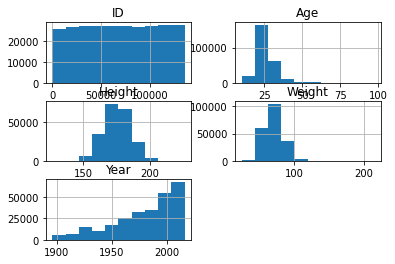

In [22]:
athletes.hist()

Sex
F    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
M    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

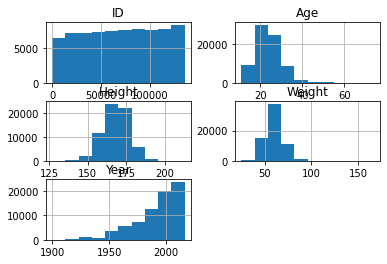

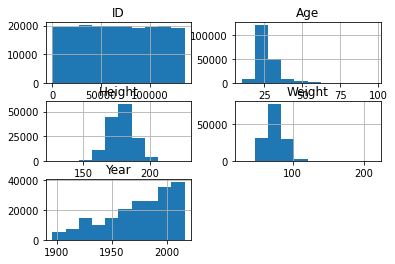

In [23]:
athletes.groupby('Sex').hist()

In [24]:
athletes.isna()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
271112,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
271113,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
271114,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [25]:
countries.isna()

,NOC,region,notes
0,False,False,True
1,False,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
225,False,False,True
226,False,False,False
227,False,False,False
228,False,False,True


In [26]:
athletes.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [27]:
countries.isna().sum()

NOC         0
region      3
notes     209
dtype: int64

<AxesSubplot:title={'center':'Number of Misssing Values'}, xlabel='index'>

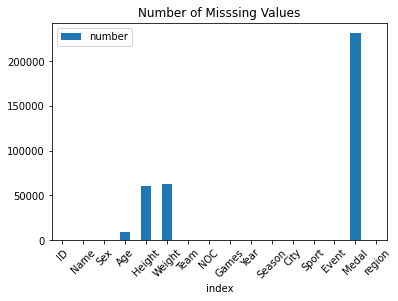

In [45]:
athletes.isna().sum().reset_index(name="number").plot.bar(x='index', y='number', rot=45, title = 'Number of Misssing Values')

## Our First Question: 
## What are the trends of the number of Women Competing?

In [50]:
a = athletes['Year'].unique()
a = sorted(a)
a

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1994,
 1996,
 1998,
 2000,
 2002,
 2004,
 2006,
 2008,
 2010,
 2012,
 2014,
 2016]

In [51]:
genders = athletes.groupby(['Year', 'Sex'])['Sex'].count().unstack().fillna(0).apply(lambda l: l, axis=1)
genders['Percent'] = genders['F']/(genders['M'] + genders['F'])*100
genders['Year'] = a

In [158]:
genders

Sex,F,M,Percent,Year
Year,,,,
1896,0.0,380.0,0.000000,1896
1900,33.0,1903.0,1.704545,1900
1904,16.0,1285.0,1.229823,1904
1906,11.0,1722.0,0.634737,1906
1908,47.0,3054.0,1.515640,1908
1912,87.0,3953.0,2.153465,1912
1920,134.0,4158.0,3.122088,1920
1924,261.0,5432.0,4.584578,1924
1928,437.0,5137.0,7.839971,1928


<AxesSubplot:title={'center':'Number of Athletes by Year'}, xlabel='Year'>

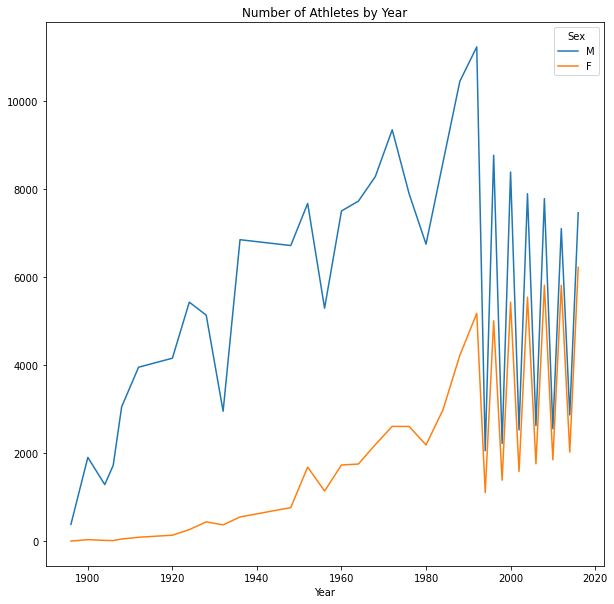

In [53]:
genders.plot(y=["M", "F"],title = 'Number of Athletes by Year',
        kind="line", figsize=(10, 10))

<AxesSubplot:title={'center':'Percent of Women by Year'}, xlabel='Year'>

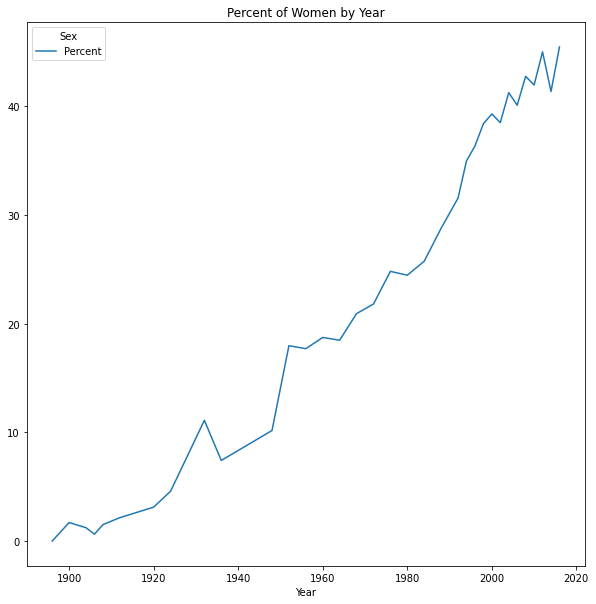

In [49]:
genders.plot(y=["Percent"], title = 'Percent of Women by Year',
        kind="line", figsize=(10, 10))

In [117]:
print(genders['M'].corr(genders['F']))

0.688944799710349


In [118]:
print(genders['F'].corr(genders['Percent']))

0.7876708271587262


We get ~0.98 as the correlation between the scores of Year and Percent of Medals won. This indicates that the two columns highly correlated in a positive direction. That is, for a higher value in Years we are observing a higher value Percent of Medals won for the Women and vice versa.

In [159]:
print(genders.corr())

Sex             F         M   Percent      Year
Sex                                            
F        1.000000  0.688945  0.787671  0.775059
M        0.688945  1.000000  0.323489  0.419531
Percent  0.787671  0.323489  1.000000  0.983625
Year     0.775059  0.419531  0.983625  1.000000


## Next, we merge the athletes and countries dataframes, so we have the countries for the athletes.

In [23]:
team_names = pd.merge(athletes, countries, left_on='NOC', right_on='NOC', how='left').drop('notes', axis=1)

In [24]:
athletes = team_names
athletes

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland


## Now we explore the total medals won, total medals won by country and medals won by year. 

In [25]:
medalsgp = athletes['Medal'].reset_index().groupby('Medal')
medalsgp.count().reset_index()

,Medal,index
0,Bronze,13295
1,Gold,13372
2,Silver,13116


In [26]:
Medals = athletes.groupby([ 'Year','region', 'Medal'])['Year'].count().unstack().fillna(0).apply(lambda l: l, axis=1)

In [27]:
# Medals.drop('No_Medal', inplace=True, axis=1)
Medals['Total'] = Medals['Gold'] + Medals['Silver'] + Medals['Bronze']
Medals

Medal           Bronze  Gold  Silver  Total
Year region                                
1896 Australia     1.0   2.0     0.0    3.0
     Austria       2.0   2.0     1.0    5.0
     Denmark       3.0   1.0     2.0    6.0
     France        2.0   5.0     4.0   11.0
     Germany       2.0  25.0     5.0   32.0
...                ...   ...     ...    ...
2016 Bahrain       0.0   1.0     1.0    2.0
     Grenada       0.0   0.0     1.0    1.0
     Fiji          0.0  13.0     0.0   13.0
     Jordan        0.0   1.0     0.0    1.0
     Kosovo        0.0   1.0     0.0    1.0

[1429 rows x 4 columns]

In [47]:
Medals = Medals[['Gold', 'Silver', 'Bronze', 'Total']]
Medals.columns

Index(['Gold', 'Silver', 'Bronze', 'Total'], dtype='object', name='Medal')

In [48]:
athletes[['Medal', 'region']].reset_index().groupby(['Medal', 'region']).count().sort_values(by='index', ascending=False).head(30).unstack().fillna(0)

index                                                               \
region     USA  Russia Germany     UK France  Italy Sweden Australia Canada   
Medal                                                                         
Bronze  1358.0  1178.0  1260.0  651.0  666.0  531.0  535.0     522.0  451.0   
Gold    2638.0  1599.0  1301.0  678.0  501.0  575.0  479.0       0.0  463.0   
Silver  1641.0  1170.0  1195.0  739.0  610.0  531.0  522.0     459.0  438.0   

                                           
region Finland Hungary Netherlands Norway  
Medal                                      
Bronze   432.0     0.0       413.0    0.0  
Gold       0.0   432.0         0.0  378.0  
Silver     0.0     0.0         0.0    0.0

In [50]:
Medals = athletes[[ 'region', 'Medal']].reset_index().groupby(['region','Medal']).count().sort_values(by='index', ascending=False).head(30).unstack().fillna(0)
#Medals['Total'] = Medals['Gold'] + Medals['Silver'] + Medals['Bronze']
Medals.loc[:,'Total'] = Medals.sum(axis=1)
#Medals = Medals.T
Medals.sort_values(by = 'Total', inplace = True,ascending = False)
#Medals = Medals[['Gold', 'Silver', 'Bronze', 'Total']]
Medals

index                   Total
Medal        Bronze    Gold  Silver        
region                                     
USA          1358.0  2638.0  1641.0  5637.0
Russia       1178.0  1599.0  1170.0  3947.0
Germany      1260.0  1301.0  1195.0  3756.0
UK            651.0   678.0   739.0  2068.0
France        666.0   501.0   610.0  1777.0
Italy         531.0   575.0   531.0  1637.0
Sweden        535.0   479.0   522.0  1536.0
Canada        451.0   463.0   438.0  1352.0
Australia     522.0     0.0   459.0   981.0
Hungary         0.0   432.0     0.0   432.0
Finland       432.0     0.0     0.0   432.0
Netherlands   413.0     0.0     0.0   413.0
Norway          0.0   378.0     0.0   378.0

In [29]:
Medal_Country = athletes[['Medal', 'region']].reset_index().groupby(['Medal', 'region']).count().sort_values(by='index', ascending=False).head(30).unstack().fillna(0)
#.plot(kind='bar', stacked=False, figsize=(32, 6), title='Awarded Medals by Type per Country')
Medal_Country = Medal_Country.T
Medal_Country = Medal_Country.reindex(columns= ['Gold', 'Silver', 'Bronze'])
Medal_Country

Medal                Gold  Silver  Bronze
      region                             
index USA          2638.0  1641.0  1358.0
      Russia       1599.0  1170.0  1178.0
      Germany      1301.0  1195.0  1260.0
      UK            678.0   739.0   651.0
      France        501.0   610.0   666.0
      Italy         575.0   531.0   531.0
      Sweden        479.0   522.0   535.0
      Australia       0.0   459.0   522.0
      Canada        463.0   438.0   451.0
      Finland         0.0     0.0   432.0
      Hungary       432.0     0.0     0.0
      Netherlands     0.0     0.0   413.0
      Norway        378.0     0.0     0.0

In [203]:
Medal_Country.columns

Index(['Gold', 'Silver', 'Bronze'], dtype='object', name='Medal')

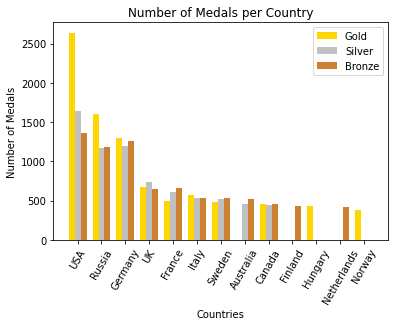

In [30]:
labels = ['USA', 'Russia', 'Germany', 'UK', 'France', 'Italy', 'Sweden', 'Australia', 'Canada', 'Finland',
    'Hungary', 'Netherlands', 'Norway']

n=13
r = np.arange(n)
width = 0.25
X_axis = np.arange(len(labels))
Gold = Medal_Country['Gold']
Silver = Medal_Country['Silver']
Bronze = Medal_Country['Bronze']
  
plt.bar(r, Gold, width, label = 'Gold', color = 'Gold')
plt.bar(r + width, Silver, width, label = 'Silver', color = 'Silver')
plt.bar(r + 2*width, Bronze, width, label = 'Bronze', color = '#CD7F32')
plt.xticks(r + width,['USA', 'Russia', 'Germany', 'UK', 'France', 'Italy', 'Sweden', 'Australia', 'Canada', 'Finland',
    'Hungary', 'Netherlands', 'Norway'], rotation=60)
  
##plt.xticks(X_axis, labels, rotation=0)
plt.xlabel("Countries")
plt.ylabel("Number of Medals")
plt.title("Number of Medals per Country")
plt.legend()
plt.show()

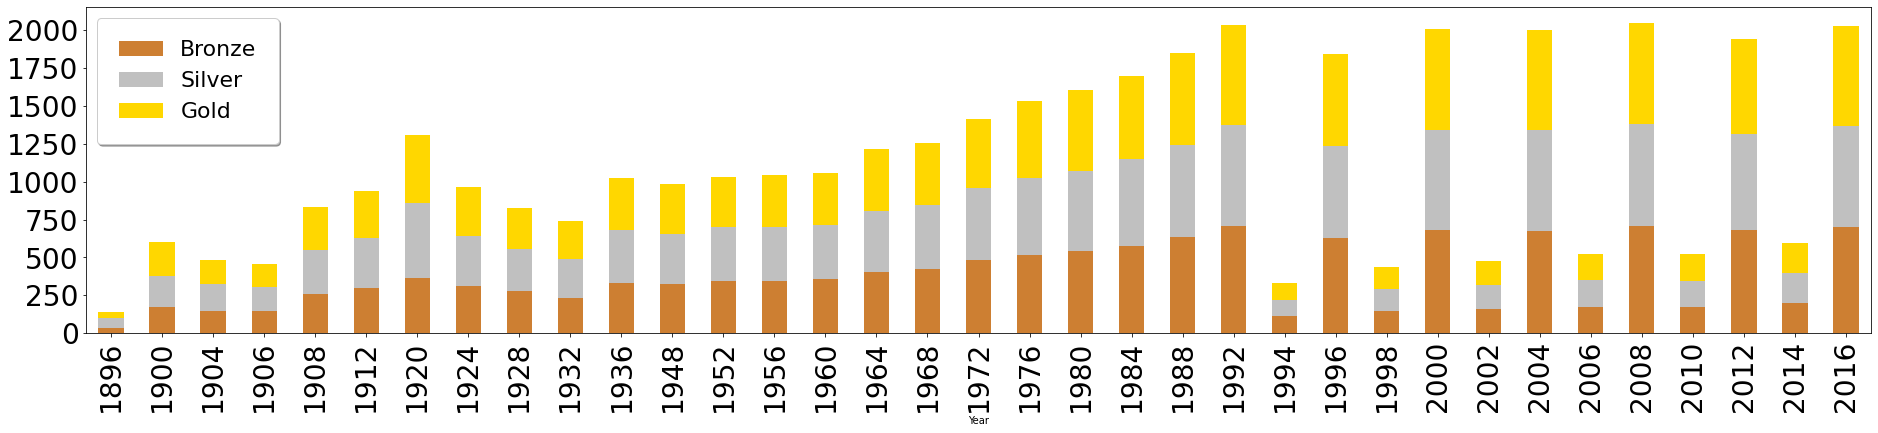

In [31]:
colors = ["#CD7F32", "silver","gold"]
Medal_Type = athletes[['Year', 'Medal']].reset_index().groupby(['Year', 'Medal']).count().unstack().fillna(0)
plt = Medal_Type.plot(
        kind="bar", stacked = True, color = colors, figsize=(32, 6), fontsize=28)
##plt.bar(Medal_Type,'index')
##plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, fontsize=22)
plt.legend(['Bronze', 'Silver', 'Gold'], fancybox=True, framealpha=1, shadow=True, borderpad=1, fontsize=22)
##plt.xticks(rotation=60)
#plot(kind='bar', stacked=True, color=colors, figsize=(32, 6), title='Awarded Medals by Type per Year', fontsize=24)
print()

#### We will examine the USA medal wins below, in Question #3

## Our Second Question: 
## Who are the Top Athletes?

In [54]:
Top_ath = athletes[['Medal', 'ID', 'Name', 'Sport', 'region']].reset_index().groupby(['Medal', 'ID', 'Name','Sport', 'region']).count().sort_values(by='index', ascending=False).reset_index()
Top_ath

,Medal,ID,Name,Sport,region,index
0,Gold,94406,"Michael Fred Phelps, II",Swimming,USA,23
1,Gold,33557,"Raymond Clarence ""Ray"" Ewry",Athletics,USA,10
2,Gold,87390,Paavo Johannes Nurmi,Athletics,Finland,9
3,Gold,67046,Larysa Semenivna Latynina (Diriy-),Gymnastics,Russia,9
4,Gold,113912,Mark Andrew Spitz,Swimming,USA,9
...,...,...,...,...,...,...
33821,Bronze,132778,Andrey Nikolayevich Yegorchev,Volleyball,Russia,1
33822,Bronze,132774,Alfred Kirwa Yego,Athletics,Kenya,1
33823,Bronze,132768,Liliya Mykolavna Yefremova (-Vaihina),Biathlon,Ukraine,1
33824,Bronze,132765,Yuliya Andreyevna Yefimova,Swimming,Russia,1


In [55]:
Top_ath.rename(columns={'index':'Total'},
inplace=True)

In [56]:
Top_ath

,Medal,ID,Name,Sport,region,Total
0,Gold,94406,"Michael Fred Phelps, II",Swimming,USA,23
1,Gold,33557,"Raymond Clarence ""Ray"" Ewry",Athletics,USA,10
2,Gold,87390,Paavo Johannes Nurmi,Athletics,Finland,9
3,Gold,67046,Larysa Semenivna Latynina (Diriy-),Gymnastics,Russia,9
4,Gold,113912,Mark Andrew Spitz,Swimming,USA,9
...,...,...,...,...,...,...
33821,Bronze,132778,Andrey Nikolayevich Yegorchev,Volleyball,Russia,1
33822,Bronze,132774,Alfred Kirwa Yego,Athletics,Kenya,1
33823,Bronze,132768,Liliya Mykolavna Yefremova (-Vaihina),Biathlon,Ukraine,1
33824,Bronze,132765,Yuliya Andreyevna Yefimova,Swimming,Russia,1


## We examine first just Gold medals, since those are the most prestigious.

In [57]:
#pysqldf("Select Medal, ID, Name, Sport, index as Total FROM Top_ath;")
Gold = pysqldf("SELECT * FROM Top_ath Where Medal = 'Gold' and Total > 5;")

In [58]:
Gold.head(50)

,Medal,ID,Name,Sport,region,Total
0,Gold,94406,"Michael Fred Phelps, II",Swimming,USA,23
1,Gold,33557,"Raymond Clarence ""Ray"" Ewry",Athletics,USA,10
2,Gold,87390,Paavo Johannes Nurmi,Athletics,Finland,9
3,Gold,67046,Larysa Semenivna Latynina (Diriy-),Gymnastics,Russia,9
4,Gold,113912,Mark Andrew Spitz,Swimming,USA,9
5,Gold,69210,"Frederick Carlton ""Carl"" Lewis",Athletics,USA,9
6,Gold,11642,"Matthew Nicholas ""Matt"" Biondi",Swimming,USA,8
7,Gold,13029,Usain St. Leo Bolt,Athletics,Jamaica,8
8,Gold,11951,Ole Einar Bjrndalen,Biathlon,Norway,8
9,Gold,57998,Sawao Kato,Gymnastics,Japan,8


## Now, we examine total medals.

In [60]:
Total = pysqldf("SELECT Name, Sum(Total) as Num, Sport, region FROM Top_ath Group By Name Order By Num Desc;")
Total = pysqldf("SELECT * FROM Total Where Num >=10;")
Total.head(50)

,Name,Num,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
1,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
2,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
3,Takashi Ono,13,Gymnastics,Japan
4,Ole Einar Bjrndalen,13,Biathlon,Norway
5,Edoardo Mangiarotti,13,Fencing,Italy
6,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
7,Sawao Kato,12,Gymnastics,Japan
8,Ryan Steven Lochte,12,Swimming,USA
9,Paavo Johannes Nurmi,12,Athletics,Finland


## Our Third Question: 
## Since I am from the USA, how is the total number of medals won by the USA changing.

In [265]:
Medal_Count = pysqldf("SELECT Year, region, Season, Count(Medal) as Total_Medals FROM athletes Where region = 'USA'  and Season = 'Summer' Group By Year;")
Medal_Count.head(30)

,Year,region,Season,Total_Medals
0,1896,USA,Summer,20
1,1900,USA,Summer,63
2,1904,USA,Summer,394
3,1906,USA,Summer,24
4,1908,USA,Summer,65
5,1912,USA,Summer,107
6,1920,USA,Summer,194
7,1924,USA,Summer,182
8,1928,USA,Summer,88
9,1932,USA,Summer,189


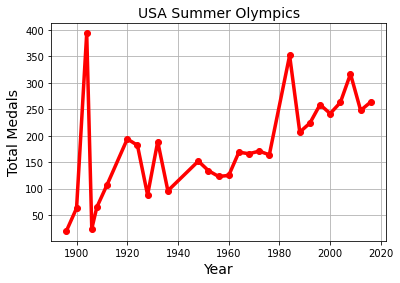

In [272]:
import numpy as np 
import matplotlib.pyplot as plt 

plt.plot(Medal_Count['Year'], Medal_Count['Total_Medals'], color='red', marker='o', linewidth=3.5)
plt.title('USA Summer Olympics', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Medals', fontsize=14)
plt.grid(True)
plt.show()

In [264]:
Medal_Count.columns

Index(['Gold', 'Silver', 'Bronze'], dtype='object', name='Medal')

In [268]:
y=np.array(Medal_Count['Total_Medals'].dropna().values, dtype=float)
x=np.array(pd.to_datetime(Medal_Count['Year'].dropna()).index.values, dtype=float)
#x=np.array(Medal_Count['Year'])
#.dropna().values, dtype=object)
slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
xf = np.linspace(min(x),max(x),100)
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)
yf = (slope*xf)+intercept
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)

r =  0.5949942935503577 
 p =  0.0008388856531915705 
 s =  1.7809068697042536


The slope is 1.4543411526626966 and the intercept is -2665.736792932664


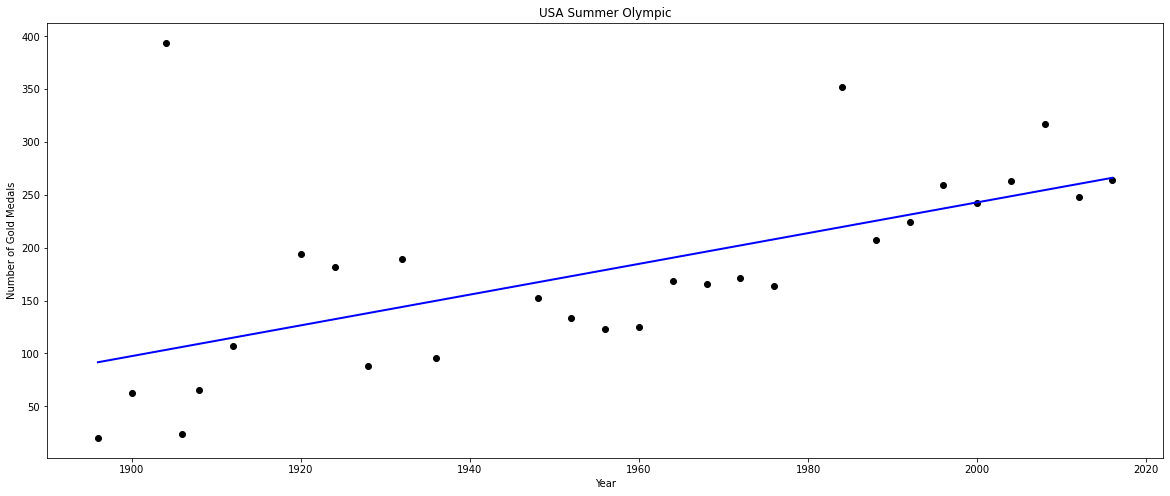

In [273]:
X = Medal_Count['Year'].values.reshape(-1,1)
y = Medal_Count['Total_Medals'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print(f"The slope is {reg.coef_[0][0]} and the intercept is {reg.intercept_[0]}")
predictions = reg.predict(X.reshape(-1, 1))
plt.figure(figsize=(20, 8))
plt.scatter(X, y,c='black')
plt.plot(X, predictions, c='blue', linewidth=2)
plt.title('USA Summer Olympic');
plt.ylabel('Number of Medals');
plt.xlabel('Year');
plt.show()

In [114]:
print(reg.coef_)  # model coefficient value
print(reg.intercept_)  # model intercept value

[[1.45434115]]
[-2665.73679293]


In [275]:
X = sm.add_constant(Medal_Count['Year'])
model = sm.OLS(Medal_Count['Total_Medals'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Total_Medals   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     14.57
Date:                Sat, 14 Aug 2021   Prob (F-statistic):           0.000752
Time:                        16:07:12   Log-Likelihood:                -159.89
No. Observations:                  28   AIC:                             323.8
Df Residuals:                      26   BIC:                             326.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2665.7368    745.273     -3.577      0.0

In [274]:
print(Medal_Count.corr())

                  Year  Total_Medals
Year          1.000000      0.599297
Total_Medals  0.599297      1.000000


In [276]:
from scipy.stats.stats import pearsonr

pearsonr(Medal_Count['Total_Medals'], Medal_Count['Year'])

#(0.335, 0.017398)

(0.5992965129390524, 0.0007515890042557843)

## The correlation coefficient is 0.60 and the two-tailed  p-value is .0008. Meaning there is a fairly high positive correlation and since this p-value is less than .05, we would conclude that there is a statistically significant correlation between the two variables. The intercept (not really meaningful) and the slope were both statistically significant (~.001) but the R<sup>2</sup> was only .36 – meaning only about 36% of the data is explained by the regression line. This indicates that Linear Regression might not be a suitable model.